In [2]:
# Install requirements
!pip install pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 12.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 12.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 6.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 13.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 10.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 10.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 14.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 

In [3]:
# Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Connect to the SQLite database
conn = sqlite3.connect('debtor_data.db')


In [5]:
# Load the data into pandas DataFrames
massive_actions = pd.read_sql_query("SELECT * FROM MassiveActions", conn)
payment_agreements = pd.read_sql_query("SELECT * FROM PaymentAgreements", conn)
payment_confirmations = pd.read_sql_query("SELECT * FROM PaymentConfirmations", conn)


In [6]:
# Close the database connection
conn.close()


In [7]:
# Display the first few rows of each DataFrame
print("Massive Actions:")
print(massive_actions.head())
print("\nPayment Agreements:")
print(payment_agreements.head())
print("\nPayment Confirmations:")
print(payment_confirmations.head())


Massive Actions:
   action_id  debtor_id action_type action_date action_status
0          1       1665        Call  2023-09-18     Completed
1          2       1538        Call  2023-09-05          Sent
2          3       1650       Email  2023-08-07     Completed
3          4       1509       Email  2023-11-27          Sent
4          5       1210         SMS  2023-05-15          Sent

Payment Agreements:
   agreement_id  debtor_id agreement_date  payment_plan    due_date
0             1       1127     2023-07-20  $297 monthly  2023-08-19
1             2       1106     2023-07-26  $336 monthly  2023-08-25
2             3       1799     2023-03-15  $225 monthly  2023-04-14
3             4       1883     2023-09-05  $132 monthly  2023-10-05
4             5       1767     2023-04-21  $327 monthly  2023-05-21

Payment Confirmations:
   payment_id  debtor_id payment_date  amount_paid receipt_confirmed
0           1       1500   2023-01-27       320.86               Yes
1           2       


Count of Actions by Type:
action_type
Email    3384
Call     3347
SMS      3269
Name: count, dtype: int64


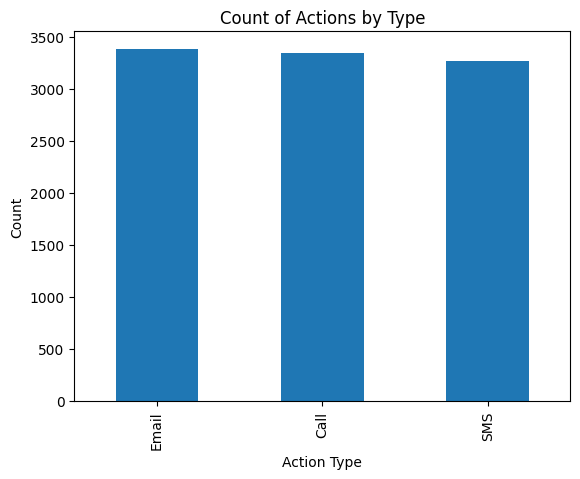

In [8]:
# Basic Data Analysis

# 1. Count of actions by type
actions_by_type = massive_actions['action_type'].value_counts()
print("\nCount of Actions by Type:")
print(actions_by_type)

# Plot the count of actions by type
actions_by_type.plot(kind='bar', title='Count of Actions by Type')
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.show()



Count of Agreements by Month:
agreement_date
2023-01    864
2023-02    767
2023-03    857
2023-04    817
2023-05    852
2023-06    786
2023-07    886
2023-08    835
2023-09    840
2023-10    827
2023-11    832
2023-12    837
Freq: M, Name: count, dtype: int64

Count of Confirmations by Month:
payment_date
2023-01    879
2023-02    785
2023-03    826
2023-04    780
2023-05    854
2023-06    802
2023-07    901
2023-08    842
2023-09    812
2023-10    816
2023-11    818
2023-12    885
Freq: M, Name: count, dtype: int64


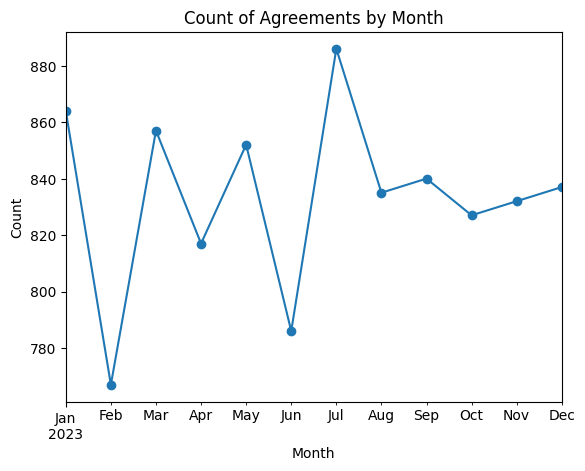

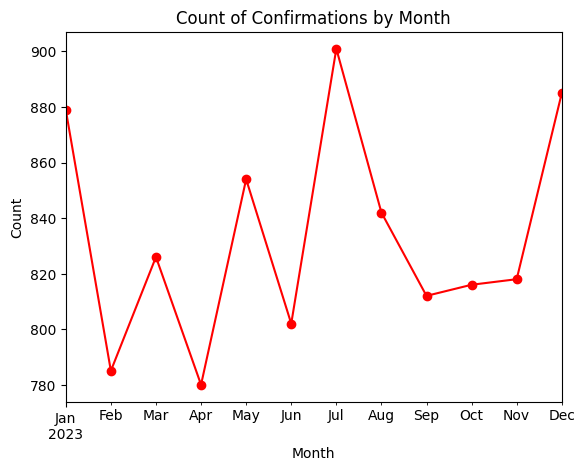

In [9]:
# 2. Count of agreements and confirmations by month
massive_actions['action_date'] = pd.to_datetime(massive_actions['action_date'])
payment_agreements['agreement_date'] = pd.to_datetime(payment_agreements['agreement_date'])
payment_confirmations['payment_date'] = pd.to_datetime(payment_confirmations['payment_date'])

agreements_by_month = payment_agreements['agreement_date'].dt.to_period('M').value_counts().sort_index()
confirmations_by_month = payment_confirmations['payment_date'].dt.to_period('M').value_counts().sort_index()

print("\nCount of Agreements by Month:")
print(agreements_by_month)

print("\nCount of Confirmations by Month:")
print(confirmations_by_month)

# Plot the count of agreements and confirmations by month
agreements_by_month.plot(kind='line', title='Count of Agreements by Month', marker='o')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

confirmations_by_month.plot(kind='line', title='Count of Confirmations by Month', marker='o', color='red')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()



Total Amount Paid by Month:
payment_date
2023-01    235548.68
2023-02    211146.80
2023-03    226962.62
2023-04    214195.26
2023-05    232639.69
2023-06    220612.53
2023-07    245205.31
2023-08    229820.72
2023-09    217011.27
2023-10    226158.15
2023-11    224860.72
2023-12    245137.38
Freq: M, Name: amount_paid, dtype: float64


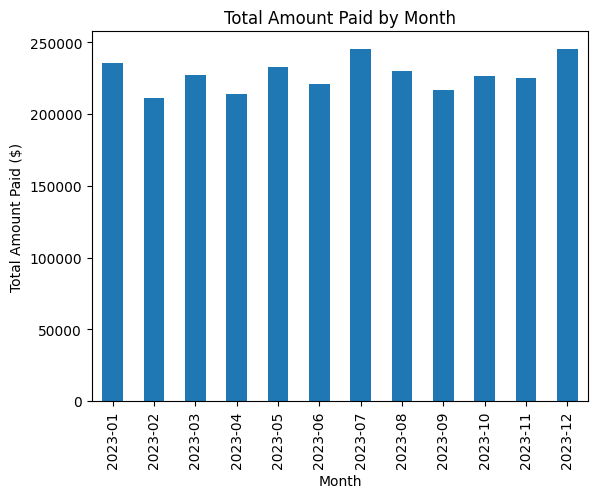

In [10]:
# 3. Total amount paid by month
total_paid_by_month = payment_confirmations.groupby(payment_confirmations['payment_date'].dt.to_period('M'))['amount_paid'].sum().sort_index()

print("\nTotal Amount Paid by Month:")
print(total_paid_by_month)

# Plot the total amount paid by month
total_paid_by_month.plot(kind='bar', title='Total Amount Paid by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount Paid ($)')
plt.show()


In [11]:
# 4. Agreement vs. Confirmation Analysis
# Merging datasets to analyze if agreements lead to confirmations
merged_data = pd.merge(payment_agreements, payment_confirmations, on='debtor_id', how='left', suffixes=('_agreement', '_confirmation'))

# Check the merged data
print("\nMerged Data (Agreements and Confirmations):")
print(merged_data.head())

# Calculate the proportion of agreements that led to confirmed payments
agreement_to_confirmation = merged_data[~merged_data['payment_date'].isnull()].shape[0] / payment_agreements.shape[0]
print(f"\nProportion of Agreements Leading to Confirmed Payments: {agreement_to_confirmation:.2f}")



Merged Data (Agreements and Confirmations):
   agreement_id  debtor_id agreement_date  payment_plan    due_date  \
0             1       1127     2023-07-20  $297 monthly  2023-08-19   
1             1       1127     2023-07-20  $297 monthly  2023-08-19   
2             1       1127     2023-07-20  $297 monthly  2023-08-19   
3             1       1127     2023-07-20  $297 monthly  2023-08-19   
4             1       1127     2023-07-20  $297 monthly  2023-08-19   

   payment_id payment_date  amount_paid receipt_confirmed  
0         401   2023-04-19       196.44                No  
1        1051   2023-12-15       211.02                No  
2        2567   2023-04-06       328.10               Yes  
3        3591   2023-12-27       287.82                No  
4        3833   2023-01-06       206.45                No  

Proportion of Agreements Leading to Confirmed Payments: 9.95



Top 5 Debtors by Total Amount Paid:
debtor_id
1368    6526.99
1728    5795.07
1543    5787.91
1338    5708.55
1198    5531.69
Name: amount_paid, dtype: float64


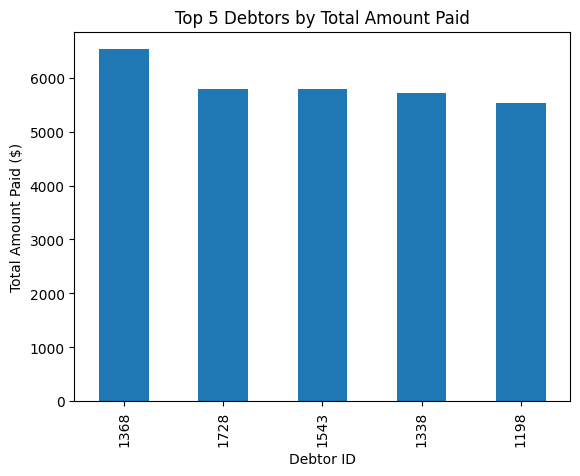

In [12]:
# Additional Analysis
# Top 5 debtors by total amount paid
top_debtors = payment_confirmations.groupby('debtor_id')['amount_paid'].sum().nlargest(5)

print("\nTop 5 Debtors by Total Amount Paid:")
print(top_debtors)

# Plot top 5 debtors by total amount paid
top_debtors.plot(kind='bar', title='Top 5 Debtors by Total Amount Paid')
plt.xlabel('Debtor ID')
plt.ylabel('Total Amount Paid ($)')
plt.show()
